In [ ]:
# Class imbalance occurs when one class in a dataset has significantly more samples than another, leading to biased model performance.

# Upsampling – Increases minority class samples by duplication or synthetic generation.
# Downsampling – Reduces majority class samples by random removal.
# SMOTE – Generates synthetic minority class samples using interpolation. 


In [2]:
import numpy as np
import pandas as pd

In [3]:
# np.random.seed(1) generates a different fixed sequence of random numbers every time, 
# ensuring reproducibility while varying output based on the seed value.

np.random.seed(1)

In [4]:
# Let 1000 sample Where Majority(0) Has 900 Rows And Minority(1) Has 100 Rows....
Total_Samples=1000

Total_Zero_Samples=900
Total_Zero_Ratio=0.9

Total_One_Samples=100
Total_One_Ratio=0.1

Total_Zero_Samples,Total_One_Samples

(900, 100)

In [16]:
# Creating a DataFrame for class 0 with normally distributed features and a target label of 0.
class_0 = {
    'feature1': np.random.normal(0, 1, Total_Zero_Samples),
    'feature2': np.random.normal(0, 1, Total_Zero_Samples),
    'target': [0] * Total_Zero_Samples
}
class_Zero_Data = pd.DataFrame(class_0)
class_Zero_Data

,feature1,feature2,target
0,1.495433,-1.085116,0
1,-0.106857,-0.507023,0
2,-1.230207,-0.156883,0
3,-0.381729,2.167018,0
4,1.480669,0.594138,0
...,...,...,...
895,-0.842251,-1.110081,0
896,-0.850232,0.205227,0
897,0.800880,-1.491972,0
898,1.584839,-0.385815,0


In [18]:
# Creating a DataFrame for class 1 with normally distributed features and a target label of 1.
class_1 = {
    'feature1': np.random.normal(3, 1, Total_One_Samples),
    'feature2': np.random.normal(3, 1, Total_One_Samples),
    'target': [1] * Total_One_Samples
}
class_One_Data = pd.DataFrame(class_1)
class_One_Data

,feature1,feature2,target
0,2.120499,3.174306,1
1,0.908156,4.189508,1
2,4.180734,4.055755,1
3,2.716625,1.975604,1
4,3.455494,2.537204,1
...,...,...,...
95,2.499883,3.815149,1
96,3.076407,2.303572,1
97,4.650168,2.556544,1
98,2.931245,3.785413,1


In [26]:
df=pd.concat([class_Zero_Data,class_One_Data]).reset_index(drop=True)
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [36]:
# Upsampling Of Data.....
df_majority=df[df.target==0]
df_minority=df[df.target==1]

from sklearn.utils import resample

df_minority_UpSample= resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)
df_minority_UpSample

,feature1,feature2,target
937,3.770983,1.834633,1
912,2.682268,3.256160,1
972,2.131564,4.528415,1
909,1.431372,2.813666,1
975,4.007814,3.179529,1
...,...,...,...
936,0.900017,3.444147,1
998,2.931245,3.785413,1
901,0.908156,4.189508,1
932,2.386816,3.049840,1


In [38]:
df_upSampled=pd.concat([df_majority,df_minority_UpSample])
df_upSampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [41]:
# Downsampling Of Data.....
# We Know That df_majority=df[df.target==0] && df_minority=df[df.target==1]

df_majority_DownSample= resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)
df_majority_DownSample

,feature1,feature2,target
860,-0.078269,-0.724141,0
880,0.462640,-0.771241,0
874,-0.686958,-0.596447,0
780,0.304906,-0.589201,0
525,-0.316721,-0.260371,0
...,...,...,...
494,-0.117670,0.576173,0
255,-1.289291,0.107204,0
672,-2.497457,0.140502,0
481,2.258790,1.110028,0


In [42]:
df_downSampled=pd.concat([df_minority,df_majority_DownSample])
df_downSampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [47]:
# SMOTE --> Synthetic Minority Over-sampling Technique
# We Know That df_majority=df[df.target==0] && df_minority=df[df.target==1]

from sklearn.datasets import make_classification

# Generating a synthetic imbalanced dataset with 1000 samples, 2 features, and 90% of data belonging to class 0.
X, y = make_classification(n_samples = 1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90], random_state=1)
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]], shape=(1000, 2))

In [ ]:
# len(y[y == 0]) returns 900 as 90% of the target labels are class 0.  
# len(X[X == 1]) is usually 0 since X contains continuous values, making exact matches with 1 rare.
len(y[y==0]),len(X[X==1])

(894, 0)

In [49]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [50]:
final_df.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

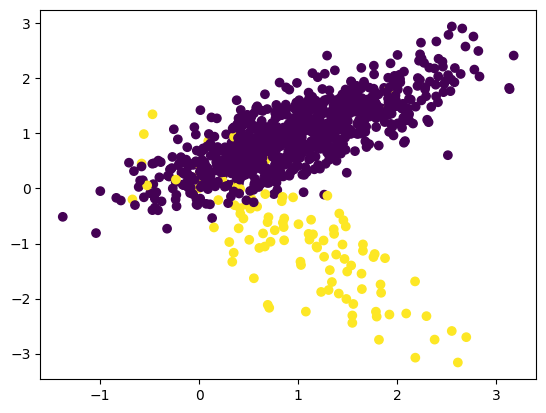

In [51]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [52]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])
X.shape,y.shape

((1788, 2), (1788,))

In [53]:
len(y[y==0]),len(y[y==1])

(894, 894)

In [54]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample_df = pd.concat([df1, df2], axis=1)
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.105388,-0.147442,1
1784,0.601650,0.371971,1
1785,1.790581,-2.282415,1
1786,-0.099140,-0.026291,1


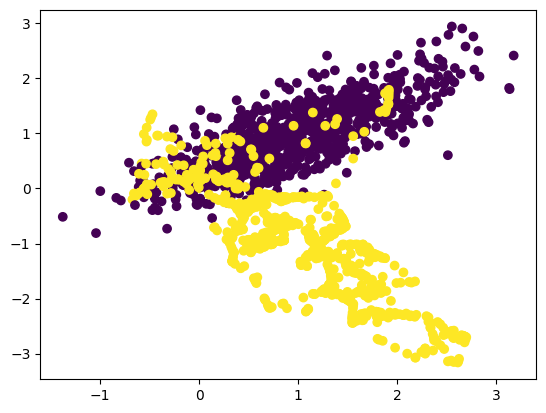

In [55]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

In [ ]:
# Disadvantages Of Above 3 :-

# Upsampling: Risk of overfitting, increased data size, and potential bias.  
# Downsampling: Loss of information, risk of underfitting, and reduced data diversity.  
# SMOTE: May create unrealistic data, cause class overlap, and increase computation. 